# Transferencia dinámica de estados cuánticos

## Sin interacciones

In [1]:
#Importan las librerias necesarias
from qutip import *
import qutip as qt


import numpy as np
import matplotlib.pyplot as plt

Base fotónica

In [2]:
#Estado de vacío |0>:
p0=fock(4,0)

#primer estado excitado |1>:
p1=fock(4,1)

#segundo estado excitado |2>:
p2=fock(4,2)

#tercero estado excitado |3>:
p3=fock(4,3)

p1

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

Base de materia

1. Deseo escribir esta base utilizando la base de Dicke que ofrece python: https://qutip.org/docs/latest/apidoc/functions.html?highlight=wigner#qutip.piqs.dicke



2. Averiguar el porque los vectores de esta base son: |-J>, |-J+1>, |-J+2>, |-J+3>.

In [3]:
#Valor del momentum angular total
j = 3/2

#Según el valor de j, m puede tener 2*j...
jj=int(2*j)

#...más 1, el valor m=0


#Base de Dicke

#|-J+3>.
d3=qt.basis(jj + 1,jj-3)
#|-J+2>
d2=qt.basis(jj + 1,jj-2)
#|-J+1>
d1=qt.basis(jj + 1,jj-1)
#|-J> 
d0=qt.basis(jj + 1,jj)


d2

Quantum object: dims = [[4], [1]], shape = (4, 1), type = ket
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]]

Base global




Los sistemas modos de cavidad y emisores forman un solo sistema. Como consecuencia hay que expandir el espacio de Hilbert, esto significa que la base resultante se obtiene a partir de aplicar el producto vectorial entre los estados de estos vectores.

3. Investigar cuál es el motivo por el cual la base global es: |-J,3>, |-J+1,2>, |-J+2,1> y |-J+3,0>, ¿con la finalidad de que el número de exitación se conserve?

In [4]:
# |-J,3>
d0p3=tensor([d0,p3])
d0p3
# |-J+1,2>
d1p2=tensor([d1,p2])
d1p2
# |-J+2,1>
d2p1=tensor([d2,p1])
d2p1
# |-J+3,0>
d3p0=tensor([d3,p0])
d3p0


d1p2.full()

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

## Hamiltoniano Tavis-Cummings

In [5]:
#Parámetros del sistema

#Número de fotones es tres, pero se debe incluir la posibilidad de que no hayan fotones dentro del sistema
N=4

#Número de emisores
n=10

#Momentum angular total
j=3/2

#Proyección de j
m=-j

#Diferencia energética cavidad
wc=1

#Diferencia energética emisores
wa=1

#Fuerza de acoplamiento campo-materia
A=0.1

#Término que representa esa fuerza de acoplamiento en ese número de emisores
g=A/((n)**(1/2))


#Operadores del sistema


#Operadores de momentum angular para los emisores
jz=tensor(jmat(j,'z'), identity(N))

jmin=tensor(jmat(j,'-'), identity(N))

jmax=tensor(jmat(j,'+'), identity(N))



#Operador destrucción de los modos de cavidad
#La forma de la identity se hizo para que cuadrara las dimensiones con
#respecto a los operadores de materia
a =tensor(identity(jmin.dims[0][0]),destroy(N))


#Hamiltoniano de Tavis-Cummings
htc=wa*jz + wc*a.dag()*a  + g*(a.dag()*jmin + a*jmax)
htc

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 1.5         0.          0.          0.          0.          0.05477226
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          2.5         0.          0.          0.          0.
   0.07745967  0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          3.5         0.          0.          0.
   0.          0.09486833  0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          4.5         0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.5         0.
   0.          0.          0.          0.06324555  0.          0.
   0.          0.          0. 

## Proyección del Hamiltoniano de acuerdo a la base del sistema

In [6]:
a1=htc.matrix_element(d0p3.dag(),d0p3)
a2=htc.matrix_element(d0p3.dag(),d1p2)
a3=htc.matrix_element(d0p3.dag(),d2p1)
a4=htc.matrix_element(d0p3.dag(),d3p0)

b1=htc.matrix_element(d1p2.dag(),d0p3)
b2=htc.matrix_element(d1p2.dag(),d1p2)
b3=htc.matrix_element(d1p2.dag(),d2p1)
b4=htc.matrix_element(d1p2.dag(),d3p0)

c1=htc.matrix_element(d2p1.dag(),d0p3)
c2=htc.matrix_element(d2p1.dag(),d1p2)
c3=htc.matrix_element(d2p1.dag(),d2p1)
c4=htc.matrix_element(d2p1.dag(),d3p0)

d1=htc.matrix_element(d3p0.dag(),d0p3)
d2=htc.matrix_element(d3p0.dag(),d1p2)
d3=htc.matrix_element(d3p0.dag(),d2p1)
d4=htc.matrix_element(d3p0.dag(),d3p0)


#Representación matricial del hamiltoniano
h=np.array([[a1,a2,a3,a4],[b1,b2,b3,b4],[c1,c2,c3,c4],[d1,d2,d3,d4]])
hh=Qobj(h)
hh

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[1.5        0.09486833 0.         0.        ]
 [0.09486833 1.5        0.08944272 0.        ]
 [0.         0.08944272 1.5        0.05477226]
 [0.         0.         0.05477226 1.5       ]]

Este resultado corresponde a la expresión (7), evaluando los parámetros de este ejemplo.

### Como mi trabajo consiste en la transferencia DINÁMICA de estados, hay que resolver la ecuación de Schrödinger dependiente del tiempo para ver como evoluciona el sistema

In [7]:
#Coeficientes de la...
n0=((2)**(1/2))/3
n3=((7)**(1/2))/3
#...condicion inicial
psi0=n0*d3p0+n3*d0p3

# star=n0*p0+n3*p3
# initial=tensor(d0,star)


#Tiempo en el que evoluciona el sistema
tlist=np.linspace(start=0,stop=800,num=800)

#Solución de la ecuación de Schrödinger
resultado=sesolve(htc, psi0, tlist, e_ops=None, args=None, options=None, progress_bar=None, _safe_mode=True)

#Forma de acceder a los estados del sistema
resultado.states

#El número de estados que surgen, corresponde al numero num
#ya que son los 'puntos' que se toman del lapso. En cada punto, se conocen 
#los estados del sistema.
len(resultado.states)

800

## Matriz de densidad

In [8]:
def rho(x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser UN número menor al número de estados puestos en el linspace del sesolve"
    
    return(resultado.states[x]*resultado.states[x].dag())

#Esta sería la matriz de densidad del estado 59
rho(59)

Quantum object: dims = [[4, 4], [4, 4]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 0.17665596+0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j         -0.1595331 -0.03270203j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j         -0.23757153-0.17705117j  0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.1601417 -0.07413294j]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j          0.        +0.j
   0.        +0.j          0.        +0.j       

### Trazas parciales

In [9]:
#Se preservan los componentes 1.
#Se preservan los fotones, y esto corresponde a p_ph para el estado 0
rho(0).ptrace(1)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.22222222 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.77777778]]

In [10]:
#Se preservan los componentes 0.
#Se preservan lo emisores esto corresponde a p_D para el estado 0
rho(0).ptrace(0)

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.22222222 0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.77777778]]

Y esto es un problema, que dan la misma matriz de densidad reducida. Me pregunto si eso es un efecto debido a la forma en como se construyó la base del sistema...

## Entropía Lineal

In [11]:
def entropia (x):
    "Entropía lineal usando un ket"
    rho(x)
    return(entropy_linear(rho(x).ptrace(0)))


#Entropía lineal para el estado 2, es decir: t=2
entropia(1)

0.3567532298257726

## Gráfica Entropía Lineal

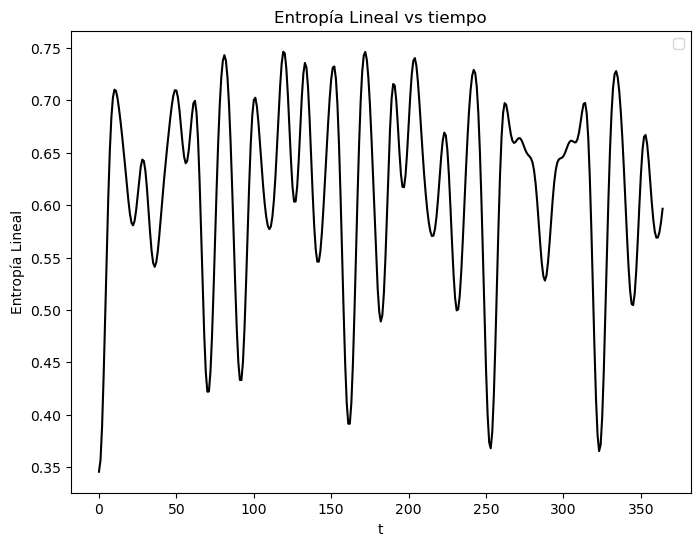

In [12]:
# Este es el  espacio donde se va a dinujar la gráfica

#El eje x va desde 0 hasta 365
x_vals=[i for i in range(365)]

#Se evalúan los valores de la entropía lineal para todos los valores de x
#valores de entropía lineal para el estado x
y1_vals=[]

for i in range(len(x_vals)):
    y1_vals.append(entropia(i))
    

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y1_vals, linestyle='-', color='black')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

## Gráfica función de correlación segundo orden $\tau=0$

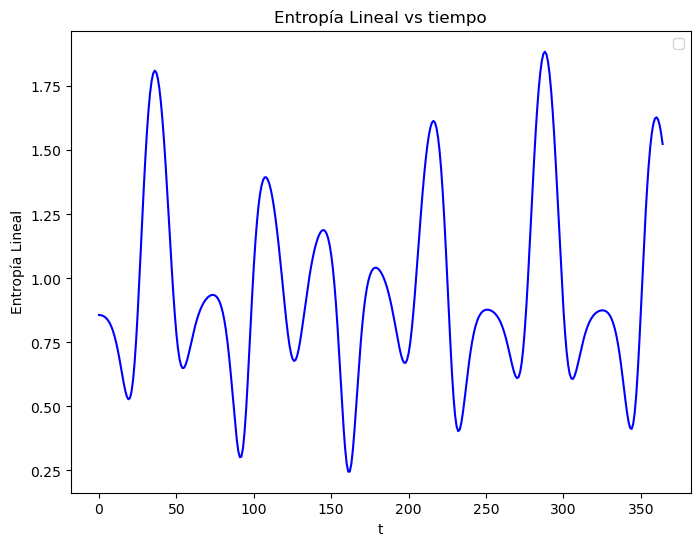

In [13]:
#operadores para crear la función de correlacion óptica de segundo orden
up=a.dag()*a.dag()*a*a
down=a.dag()*a

#Funcion de correlacion
def correlacion (x):
    "Parámetro x: x es el indice del estado correspondiente en resultado.states. La salida es la matriz n\
    de densidad a cada estado. Tiene que ser un número menor al número de estados puestos en el linspace del sesolve"
    numerador=expect(up, resultado.states[x])
    denominador=expect(down, resultado.states[x])*expect(down, resultado.states[x])
    return(numerador/denominador)

#x es un valor menor a num, que corresponde al valor del eje x de la grafica
x_vals=[i for i in range(365)]

#Valores de función de correlacion de segundo orden para el estado x
y2_vals=[]

for i in range(len(x_vals)):
    y2_vals.append(correlacion(i))
    
# Graficar los valores de x e y
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y2_vals, linestyle='-', color='b')
plt.title('Entropía Lineal vs tiempo')
plt.xlabel('t')
plt.ylabel('Entropía Lineal')
plt.legend()
plt.grid(False)
plt.show()

# Graficas de ambas cantidades superpuestas

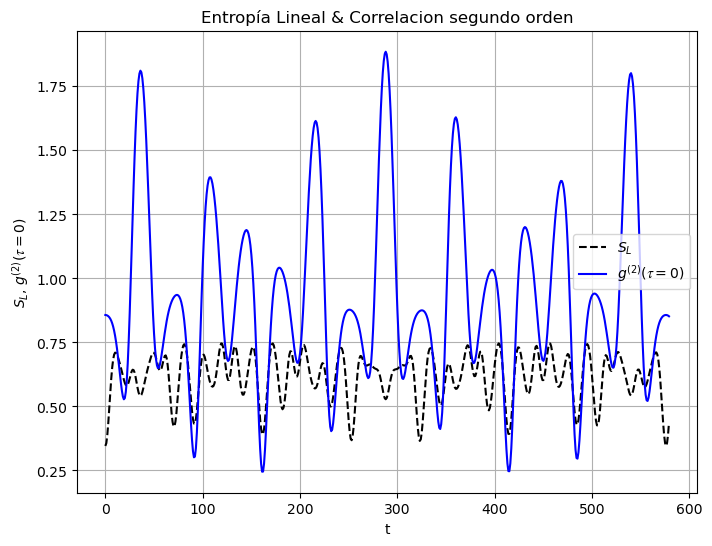

In [17]:
def entropiaycorrelacion(final):
    "Grafica entropía lineal y función de correlación óptica de segundo orden."
    "Argumento: final"
    "Corresponde al valor más grande de la absisa de la gráfica"
    
    
    x_vals=[i for i in range(final)]
    
    y2_vals=[]
    for i in range(len(x_vals)):
        y2_vals.append(correlacion(i))
    
    y1_vals=[]
    for i in range(len(x_vals)):
        y1_vals.append(entropia(i))
        

    # Graficar las dos funciones superpuestas
    plt.figure(figsize=(8, 6))

    # Graficar la primera función
    plt.plot(x_vals, y1_vals, label='$S_L$', linestyle='--',color='black')

    # Graficar la segunda función
    plt.plot(x_vals, y2_vals, label='$g^{(2)}(𝜏=0)$', linestyle='-', color='blue')



    plt.title('Entropía Lineal & Correlacion segundo orden')
    plt.xlabel('t')
    plt.ylabel('$S_L$, $g^{(2)}(𝜏=0)$')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    
    
    
entropiaycorrelacion(580)